# TP 3 : Introduction aux Réseaux de Neurones Artificiels (ANN)

`Amy EBEN SANG KOTTA`


### Etapes : 

Étape 1 : Importer les bibliothèques nécessaires

In [1]:
import ssl
import urllib
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import Adam
import matplotlib.pyplot as plt

2024-09-25 16:11:22.796649: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Étape 2 : Créer un contexte SSL qui ne vérifie pas les certificats

Je désactive la vérification SSL car il y a un problème de certificat sur mon système.

In [2]:
ssl._create_default_https_context = ssl._create_unverified_context

Étape 3 : Charger le dataset MNIST

#Je charge les données d'entraînement et de test du dataset MNIST.

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
# Vérification des tailles des jeux de données pour s'assurer qu'on a bien 60 000 pour l'entraînement et 10 000 pour le test.
print(f"Nombre d'échantillons dans le jeu d'entraînement : {x_train.shape[0]}")
print(f"Nombre d'échantillons dans le jeu de test : {x_test.shape[0]}")

Nombre d'échantillons dans le jeu d'entraînement : 60000
Nombre d'échantillons dans le jeu de test : 10000


Étape 4 : Préparation des données

Je normalise les images pour que les valeurs des pixels soient entre 0 et 1.

In [5]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

Reshape des données pour les adapter à un réseau dense :
Je transforme chaque image de 28x28 en un vecteur de 784 valeurs.
Le réseau dense attend que chaque entrée soit un vecteur.

In [6]:
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

Les étiquettes sont des entiers (0 à 9), donc je les transforme en vecteurs one-hot encodés.
Cela permet de convertir les classes en format compatible avec les réseaux de neurones.

In [7]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

Étape 5 : Créer le modèle
Je construis un modèle séquentiel avec une structure simple pour ce dataset.
- Dense(128) : une couche dense avec 128 neurones et une fonction d'activation ReLU.
- Dense(10) : la couche de sortie avec 10 neurones (pour les 10 classes), activation softmax pour obtenir des probabilités.

In [8]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(28 * 28,)),  # Je spécifie l'entrée avec une image aplatie à 784 valeurs.
    Dense(10, activation='softmax')  # J'ajoute une couche de sortie avec 10 neurones pour la classification des 10 chiffres.
])

Étape 6 : Compiler le modèle
Je compile le modèle en utilisant Adam comme optimiseur, avec une fonction de perte entropie croisée pour la classification multi-classe.
L'accuracy sera utilisé comme métrique pour évaluer la performance du modèle pendant l'entraînement.

In [9]:
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Étape 7 : Entraîner le modèle
J'entraîne le modèle sur les données d'entraînement (x_train, y_train).
Je fixe 5 époques et une taille de batch de 32.

In [10]:
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2545 - accuracy: 0.9266 - val_loss: 0.1431 - val_accuracy: 0.9569
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1124 - accuracy: 0.9661 - val_loss: 0.1025 - val_accuracy: 0.9689
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0782 - accuracy: 0.9769 - val_loss: 0.0876 - val_accuracy: 0.9732
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0585 - accuracy: 0.9820 - val_loss: 0.0878 - val_accuracy: 0.9742
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0462 - accuracy: 0.9854 - val_loss: 0.0791 - val_accuracy: 0.9769


Étape 8 : Évaluer le modèle sur les données de test
Maintenant, je vais évaluer le modèle sur les données de test pour voir comment il se comporte avec des données qu'il n'a pas encore vues.

In [11]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0791 - accuracy: 0.9769


Je peux afficher l'accuracy finale pour avoir une idée de la performance.

In [12]:
print(f"Test accuracy: {test_acc * 100:.2f}%")

Test accuracy: 97.69%


Étape 9 : Analyser les résultats
Je récupère les détails de l'entraînement (comme la précision et la perte) pour chaque époque à partir de l'objet 'history'.
Cela me permet de voir comment le modèle a progressé pendant l'entraînement.

Je trace la précision de l'entraînement et de la validation.

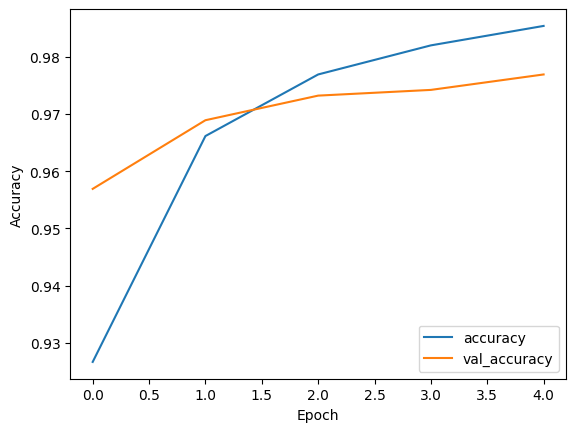

In [13]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

Je trace la courbe de perte pour voir si le modèle a bien convergé.

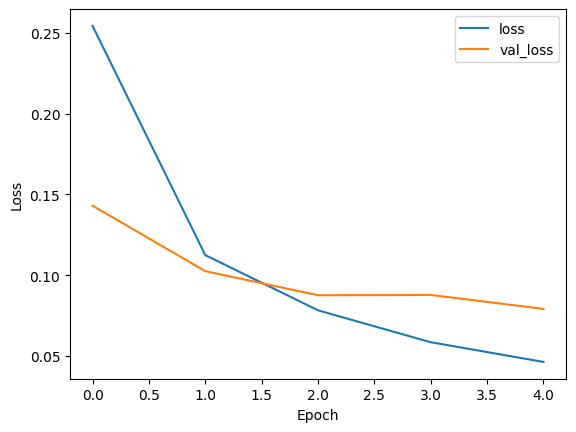

In [14]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()